In [ ]:
pip install -U fortran-magic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.0 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: unhashable type: 'slice'

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time
matmul(a, b)

CPU times: user 32 µs, sys: 6 µs, total: 38 µs
Wall time: 41 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

**------------------------------------------------------------------------**

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
%%time
try:
  print(matmul(b, a))
except Exception as e:
  print("An error has occured during the calculations: ",e)

[[24, 30, 36], [33, 42, 51]]
CPU times: user 1.53 ms, sys: 0 ns, total: 1.53 ms
Wall time: 1.49 ms


**My own example 3 - Chekcing the matrix multiplication compatibility condition  len(A[0]) == len(B)**



In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    if len(A[0]) == len(B) :
      rows_out = len(A)
      cols_out = len(B[0])
      out = [[0 for col in range(cols_out)] for row in range(rows_out)]
      for i in range(rows_out):
          for j in range(cols_out):
              for k in range(len(A[0])):
                  out[i][j] += A[i][k] * B[k][j]
      return out
    else:
      print("The matrix dimentions are not correct for multiplication.")
      return 0


**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
%%time
matmul(a, b)

The matrix dimentions are not correct for multiplication.
CPU times: user 1.15 ms, sys: 808 µs, total: 1.96 ms
Wall time: 2.01 ms


0

In [ ]:
%%time
matmul(b, a)

CPU times: user 22 µs, sys: 4 µs, total: 26 µs
Wall time: 29.3 µs


[[24, 30, 36], [33, 42, 51]]

**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [ ]:
A = [[1,2,5],[5,3,6]]
B = [[4,7],[0,1],[5,6]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
%%time
matmul(A, B)

CPU times: user 19 µs, sys: 3 µs, total: 22 µs
Wall time: 25 µs


[[29, 39], [50, 74]]

**------------------------------------------------------------------------**



In [ ]:
import random

In [ ]:
random.normalvariate(0,1)

1.6565225456388954

In [ ]:
import math


In [ ]:
import numpy as np

In [ ]:
np.random.rand(3,4)


array([[0.20258385, 0.19330305, 0.91390964, 0.8845817 ],
       [0.61590895, 0.88761561, 0.22836312, 0.42110384],
       [0.48479437, 0.49516462, 0.44899985, 0.11104682]])

In [ ]:
import random

def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.9551422893980889, 0.13405451964891624, 0.03332549950627384],
 [0.8692425715361087, 0.6399239774637324, 0.5461325238622837]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
import time
import numpy as np

def average_execution_time(randA, randB, num_runs=10, execution_type='py'):
    total_execution_time = 0

    for _ in range(num_runs):

        start_time = time.time()

        if execution_type == 'py':
          result = matmul(randA, randB)
        elif execution_type == 'np':
          result = np.dot(randa, randb)
        else:
          break

        end_time = time.time()

        execution_time = end_time - start_time
        total_execution_time += execution_time

    average_execution_time = total_execution_time / num_runs
    return average_execution_time

In [ ]:
randa = random_matrix(600,100)
randb = random_matrix(100,600)
average_time_python = average_execution_time(randa, randb)

print(f"Average time of execution for matrix multilpication in PYTHON: {average_time_python} s")

Average time of execution for matrix multilpication in PYTHON: 9.02667968273163 s


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
import pandas as pd

data = []
data.append({'Language': 'Python', 'Execution time': average_time_python})
df = pd.DataFrame(data)

print(df)

  Language  Execution time
0   Python         9.02668


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
np_randa = np.array(randa)
np_randb = np.array(randb)

average_time_numpy = average_execution_time(randa, randb, execution_type='np')
print(f"Average time of execution for matrix multilpication in NUMPY: {average_time_numpy} s")

Average time of execution for matrix multilpication in NUMPY: 0.018192458152770995 s


In [ ]:
data.append({'Language': 'Numpy', 'Execution time': average_time_numpy})
df = pd.DataFrame(data)

print(df)

  Language  Execution time
0   Python        9.026680
1    Numpy        0.018192


**------------------------------------------------------------------------**

In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%fortran_config --clean-cache

Clean cache: /root/.cache/ipython/fortranmagic/9ba265d1


In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 17.7 ms, sys: 0 ns, total: 17.7 ms
Wall time: 27.1 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 205 µs, sys: 0 ns, total: 205 µs
Wall time: 219 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:
matrixA = [[1,2],[5,3]]
matrixB = [[4,7],[0,1]]

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
%%fortran
subroutine matmul_fortran(A, B, Cout)
    double precision, intent(in) :: A(2, 2)
    double precision, intent(in) :: B(2, 2)
    double precision, intent(out) :: Cout(2, 2)

    integer :: i, j, k

    do i = 1, 2
        do j = 1, 2
            Cout(i, j) = 0.0
            do k = 1, 2
                Cout(i, j) = Cout(i, j) + A(i, k) * B(k, j)
            end do
        end do
    end do
end subroutine

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
np_A = np.array(matrixA)
np_B = np.array(matrixB)
matmul_fortran(np_A,np_B)

array([[ 4.,  9.],
       [20., 38.]])

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
%%fortran
subroutine matmul_fortran(A, B, Cout)
    double precision, intent(in) :: A(:,:)
    double precision, intent(in) :: B(:,:)
    double precision, intent(out) :: Cout(size(A, 1), size(B, 2))

    integer :: i, j, k

    do i = 1, size(A, 1)
        do j = 1, size(B, 2)
            Cout(i, j) = 0.0
            do k = 1, size(A, 2)
                Cout(i, j) = Cout(i, j) + A(i, k) * B(k, j)
            end do
        end do
    end do
end subroutine

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
matA = np.random.random((600, 100))
matB = np.random.random((100, 600))

In [ ]:
%%time
z= matmul_fortran(matA,matB)

CPU times: user 43.5 ms, sys: 2 ms, total: 45.5 ms
Wall time: 45.6 ms


**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
def multi_time_fortran(matA, matB, rep):
    tm_sum = 0

    for i in range(rep):
        st = time.process_time()

        matmul_fortran(matA,matB)

        end = time.process_time()

        tm_passed = end - st
        tm_sum += tm_passed

    avr = tm_sum / rep
    return avr

matA = np.random.random((600, 100))
matB = np.random.random((100, 600))
repetitions = 10

average_time_fortran = multi_time_fortran(matA, matB, repetitions)

print(f"Average time of execution for matrix multilpication in FORTRAN: {average_time_fortran} s")
data.append({'Language': 'Fortranmagic', 'Execution time': average_time_fortran})

df = pd.DataFrame(data)
print(df)

Average time of execution for matrix multilpication in FORTRAN: 0.04355078329999884 s
       Language  Execution time
0        Python        9.026680
1         Numpy        0.018192
2  Fortranmagic        0.043551


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matrix_multiply.f90
program matrix_multiply

    implicit none

    integer, parameter :: n = 600
    integer, parameter :: m = 100
    integer, parameter :: rep = 10

    real(8) :: matA(n, m)
    real(8) :: matB(m, n)
    real(8) :: matC(n, n)

    integer :: i, j, k, r
    real(8) :: tstart, tend

    ! Initialize matrices A and B (for simplicity, use random values)
    call random_seed()
    do i = 1, n
        do j = 1, m
            call random_number(matA(i, j))
        end do
    end do
    do i = 1, m
        do j = 1, n
            call random_number(matB(i, j))
        end do
    end do

    do r = 1, rep
        call cpu_time(tstart)
        do i = 1, n
            do j = 1, n
                matC(i, j) = 0.0
                do k = 1, m
                    matC(i, j) = matC(i, j) + matA(i, k) * matB(k, j)
                end do
            end do
        end do
        call cpu_time(tend)
        write(*, '(A, I0, A, F12.6)') "Execution ", r, " : ", tend - tstart, " s"
    end do

    write(*, '(A, F12.6)') "Average Fortran execution time: ", (tend - tstart) / rep, " s"

end program matrix_multiply

Writing matrix_multiply.f90


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!gfortran -o matrix_multiply matrix_multiply.f90
!./matrix_multiply

Execution 1 :     0.229074
 s
Execution 2 :     0.238049
 s
Execution 3 :     0.222774
 s
Execution 4 :     0.232143
 s
Execution 5 :     0.227165
 s
Execution 6 :     0.226692
 s
Execution 7 :     0.232063
 s
Execution 8 :     0.222600
 s
Execution 9 :     0.223718
 s
Execution 10 :     0.228112
 s
Average Fortran execution time:     0.022811
 s


**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
average_time_fortran = 0.022811
data.append({'Language': 'Fortran', 'Execution time': average_time_fortran})

df = pd.DataFrame(data)
print(df)

       Language  Execution time
0        Python        9.026680
1         Numpy        0.018192
2  Fortranmagic        0.043551
3       Fortran        0.023963
4       Fortran        0.022811


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matmul.c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

#define N 600
#define M 100
#define REPETITIONS 10

void matrix_multiply(double matA[N][M], double matB[M][N], double matC[N][N]) {
    int i, j, k;
    for (i = 0; i < N; i++) {
        for (j = 0; j < N; j++) {
            matC[i][j] = 0.0;
            for (k = 0; k < M; k++) {
                matC[i][j] += matA[i][k] * matB[k][j];
            }
        }
    }
}

int main() {
    double matA[N][M], matB[M][N], matC[N][N];
    int i, j, r;
    clock_t start, end;

    srand(time(NULL));
    for (i = 0; i < N; i++) {
        for (j = 0; j < M; j++) {
            matA[i][j] = (double)rand() / RAND_MAX;
            matB[j][i] = (double)rand() / RAND_MAX;
        }
    }

    for (r = 0; r < REPETITIONS; r++) {
        start = clock();
        matrix_multiply(matA, matB, matC);
        end = clock();
        double time_taken = (double)(end - start) / CLOCKS_PER_SEC;
        printf("Execution %d : %lf s\n", r + 1, time_taken);
    }

    return 0;
}

Writing matmul.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!gcc matmul.c -o matmul
!./matmul

Execution 1 : 0.187561 s
Execution 2 : 0.192509 s
Execution 3 : 0.187190 s
Execution 4 : 0.185642 s
Execution 5 : 0.197967 s
Execution 6 : 0.181865 s
Execution 7 : 0.182487 s
Execution 8 : 0.177610 s
Execution 9 : 0.182303 s
Execution 10 : 0.192002 s


**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
import subprocess

subprocess.run(["gcc", "matmul.c", "-o", "matmul"])

rep = 1

average_times = []

for _ in range(rep):
    output = subprocess.check_output(["./matmul"], text=True)
    lines = output.strip().split('\n')
    average_time = float(lines[-1].split()[-2])
    average_times.append(average_time)

average_execution_c = sum(average_times) / rep

data.append({'Language': 'C', 'Execution time': average_execution_c })


df = pd.DataFrame(data)
print(df)

       Language  Execution time
0        Python        9.026680
1         Numpy        0.018192
2  Fortranmagic        0.043551
3       Fortran        0.023963
4       Fortran        0.022811
5             C        0.177477


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

Se realizan dos implementaciones distintas para ejecutar la multiplicación de matrices. Primero se muestra a continuación una implementación haciendo uso de **memoria estática**:

In [ ]:
%%writefile matmul.cpp
#include <iostream>
#include <ctime>
#include <cstdlib>

const int N = 600;
const int M = 100;
const int REPETITIONS = 10;

void matrix_multiply(double matA[N][M], double matB[M][N], double matC[N][N]) {
    for (int i = 0; i < N; i++) {
        for (int j = 0; j < N; j++) {
            matC[i][j] = 0.0;
            for (int k = 0; k < M; k++) {
                matC[i][j] += matA[i][k] * matB[k][j];
            }
        }
    }
}

int main() {
    double matA[N][M], matB[M][N], matC[N][N];
    clock_t start, end;

    srand(time(NULL));
    for (int i = 0; i < N; i++) {
        for (int j = 0; j < M; j++) {
            matA[i][j] = (double)rand() / RAND_MAX;
            matB[j][i] = (double)rand() / RAND_MAX;
        }
    }

    for (int r = 0; r < REPETITIONS; r++) {
        start = clock();
        matrix_multiply(matA, matB, matC);
        end = clock();
        double time_taken = (double)(end - start) / CLOCKS_PER_SEC;
        std::cout << "Execution " << r + 1 << " : " << time_taken << " s\n";
    }


    return 0;
}

Writing matmul.cpp


Ahora, tenemos una implementación haciendo uso de **memoria dinámica**:

In [ ]:
%%writefile matmulpointer.cpp
#include <iostream>
#include <ctime>
#include <cstdlib>

const int N = 600;
const int M = 100;
const int REPETITIONS = 10;

void matrix_multiply(double **&matA, double **&matB, double **&matC) {
    for (int i = 0; i < N; i++) {
        for (int j = 0; j < N; j++) {
            *(*(matC+i)+j) = 0.0;
            for (int k = 0; k < M; k++) {
                *(*(matC+i)+j) += *(*(matA+i)+k) * *(*(matB+k)+j);
            }
        }
    }
}

int main() {
    double **matA, **matB, **matC;
    clock_t start, end;
    matA = new double *[N];

   for (int i=0; i < N; ++i)
   	 {
   	  	 matA[i]= new double [M];

   	 }
   	 matB = new double *[M];

   for (int i=0; i < M; ++i)
   	 {
   	  	 matB[i]= new double [N];

   	 }
   	 matC = new double *[N];

   	for (int i=0; i<N; i++){
   	    matC[i]= new double [N];
   	}

    srand(time(NULL));
    for (int i = 0; i < N; i++) {
        for (int j = 0; j < M; j++) {
            *(*(matA+i)+j) = (double)rand() / RAND_MAX;
            *(*(matB+j)+i) = (double)rand() / RAND_MAX;
        }
    }
    double total_time=0;
    for (int r = 0; r < REPETITIONS; r++) {
        start = clock();
        matrix_multiply(matA, matB, matC);
        end = clock();
        double time_taken = (double)(end - start) / CLOCKS_PER_SEC;
        total_time+=time_taken;
        std::cout << "Execution " << r + 1 << " : " << time_taken << " s\n";
    }
    double average_time = total_time/REPETITIONS;
    std::cout<<"Average execution time in C++: "<<average_time<<" s\n";

    return 0;
}

Overwriting matmulpointer.cpp


En el dataframe se considera la implementación que demuestra ser más rápida, es decir, la versión con memoria estática.

**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!g++ matmul.cpp -o matmul
!./matmul

Execution 1 : 0.189218 s
Execution 2 : 0.184901 s
Execution 3 : 0.183662 s
Execution 4 : 0.181656 s
Execution 5 : 0.195201 s
Execution 6 : 0.185478 s
Execution 7 : 0.194706 s
Execution 8 : 0.185722 s
Execution 9 : 0.193732 s
Execution 10 : 0.232247 s


In [ ]:
!g++ matmulpointer.cpp
!./matmul

Execution 1 : 0.296719 s
Execution 2 : 0.267127 s
Execution 3 : 0.278403 s
Execution 4 : 0.282947 s
Execution 5 : 0.287597 s
Execution 6 : 0.271613 s
Execution 7 : 0.270041 s
Execution 8 : 0.282954 s
Execution 9 : 0.272516 s
Execution 10 : 0.270435 s
Average execution time in C++: 0.278035 s


**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:
subprocess.run(["g++", "matmul.cpp", "-o", "matmul"])
rep = 10

average_times = []

for _ in range(rep):
    output = subprocess.check_output(["./matmul"], text=True)
    lines = output.strip().split('\n')
    average_time = float(lines[-1].split()[-2])
    average_times.append(average_time)

average_execution_cpp = sum(average_times) / rep

subprocess.run(["g++", "matmulpointer.cpp", "-o", "matmul"])


data.append({'Language': 'C++', 'Execution time': average_execution_cpp })

df = pd.DataFrame(data)
print(df)

       Language  Execution time
0        Python        9.026680
1         Numpy        0.018192
2  Fortranmagic        0.043551
3       Fortran        0.023963
4       Fortran        0.022811
5             C        0.177477
6           C++        0.176556


**My own example 24.1 - Adding C++ with pointers average execution time to the data frame**

In [ ]:
subprocess.run(["g++", "matmulpointer.cpp", "-o", "matmul"])
rep = 10

average_times = []

for _ in range(rep):
    output = subprocess.check_output(["./matmul"], text=True)
    lines = output.strip().split('\n')
    average_time = float(lines[-1].split()[-2])
    average_times.append(average_time)

average_execution_cpp = sum(average_times) / rep


data.append({'Language': 'C++ (with pointers)', 'Execution time': average_execution_cpp })

df = pd.DataFrame(data)
print(df)

              Language  Execution time
0               Python        9.026680
1                Numpy        0.018192
2         Fortranmagic        0.043551
3              Fortran        0.023963
4              Fortran        0.022811
5                    C        0.177477
6                  C++        0.176556
7  C++ (with pointers)        0.287214


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile MatrixMultiply.java
import java.util.Random;
public class MatrixMultiply {
    public static void main(String[] args) {
        final int N = 600;
        final int M = 100;
        final int REPETITIONS = 10;

        double[][] matA = new double[N][M];
        double[][] matB = new double[M][N];
        double[][] matC = new double[N][N];

        for (int i = 0; i < N; i++) {
            for (int j = 0; j < M; j++) {
                matA[i][j] = Math.random();
                matB[j][i] = Math.random();
            }
        }

        for (int r = 0; r < REPETITIONS; r++) {
            long startTime = System.nanoTime();
            matrixMultiply(matA, matB, matC);
            long endTime = System.nanoTime();

            double timeTaken = (endTime - startTime) / 1e9;
            System.out.println("Execution " + (r + 1) + " : " + timeTaken + " s");
        }
    }

    public static void matrixMultiply(double[][] matA, double[][] matB, double[][] matC) {
        int N = matA.length;
        int M = matB.length;

        for (int i = 0; i < N; i++) {
            for (int j = 0; j < N; j++) {
                matC[i][j] = 0.0;
                for (int k = 0; k < M; k++) {
                    matC[i][j] += matA[i][k] * matB[k][j];
                }
            }
        }
    }
}

Writing MatrixMultiply.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!javac MatrixMultiply.java
!java MatrixMultiply

Execution 1 : 0.200840145 s
Execution 2 : 0.131051969 s
Execution 3 : 0.123281623 s
Execution 4 : 0.127420022 s
Execution 5 : 0.130308545 s
Execution 6 : 0.123952889 s
Execution 7 : 0.125715558 s
Execution 8 : 0.128520368 s
Execution 9 : 0.126339704 s
Execution 10 : 0.124476241 s


**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
subprocess.run(["javac", "MatrixMultiply.java"])

rep = 10
average_times = []

for _ in range(rep):
    output = subprocess.check_output(["java", "MatrixMultiply"], text=True)
    lines = output.strip().split('\n')
    average_time = float(lines[-1].split()[-2])
    average_times.append(average_time)

average_execution_java = sum(average_times) / rep

data.append({'Language': 'JAVA', 'Execution time': average_execution_java })

df = pd.DataFrame(data)
print(df)

              Language  Execution time
0               Python        9.026680
1                Numpy        0.018192
2         Fortranmagic        0.043551
3              Fortran        0.023963
4              Fortran        0.022811
5                    C        0.177477
6                  C++        0.176556
7  C++ (with pointers)        0.287214
8                 JAVA        0.130510


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matrixMultiply.js
function matrixMultiply(matA, matB) {
    const N = matA.length;
    const M = matB[0].length;
    const K = matB.length;

    const matC = new Array(N);
    for (let i = 0; i < N; i++) {
        matC[i] = new Array(M).fill(0);
    }

    for (let i = 0; i < N; i++) {
        for (let j = 0; j < M; j++) {
            for (let k = 0; k < K; k++) {
                matC[i][j] += matA[i][k] * matB[k][j];
            }
        }
    }

    return matC;
}

function generateRandomMatrix(rows, cols) {
    const matrix = new Array(rows);
    for (let i = 0; i < rows; i++) {
        matrix[i] = new Array(cols);
        for (let j = 0; j < cols; j++) {
            matrix[i][j] = Math.random();
        }
    }
    return matrix;
}

const N = 600;
const M = 100;
const REPETITIONS = 10;

for (let r = 0; r < REPETITIONS; r++) {
    const matA = generateRandomMatrix(N, M);
    const matB = generateRandomMatrix(M, N);

    const startTime = Date.now();
    matrixMultiply(matA, matB);
    const endTime = Date.now();

    const timeTaken = (endTime - startTime) / 1000;
    console.log(`Execution ${r + 1} : ${timeTaken} s`);
}

Writing matrixMultiply.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!node matrixMultiply.js

Execution 1 : 0.324 s
Execution 2 : 0.318 s
Execution 3 : 0.282 s
Execution 4 : 0.279 s
Execution 5 : 0.268 s
Execution 6 : 0.258 s
Execution 7 : 0.262 s
Execution 8 : 0.281 s
Execution 9 : 0.26 s
Execution 10 : 0.266 s


**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:
subprocess.run(["node", "matrixMultiply.js"], stdout=open("output.txt", "w"))

rep = 10

average_times = []
with open("output.txt", "r") as f:
    lines = f.readlines()
    for line in lines:
        average_time = float(line.split()[-2])
        average_times.append(average_time)

average_execution_js = sum(average_times) / rep
data.append({'Language': 'JavaScript', 'Execution time': average_execution_js })

df = pd.DataFrame(data)
print(df)

              Language  Execution time
0               Python        9.026680
1                Numpy        0.018192
2         Fortranmagic        0.043551
3              Fortran        0.023963
4              Fortran        0.022811
5                    C        0.177477
6                  C++        0.176556
7  C++ (with pointers)        0.287214
8                 JAVA        0.130510
9           JavaScript        0.274200


**My own example 31 - Finding the minimun average execuiton time in the data frame**

In [ ]:
df = pd.DataFrame(data)
minimum_average_time = df['Execution time'].min()
print("Minimum average execution time:", minimum_average_time)

Minimum average execution time: 0.018192458152770995


**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
df['Speed Factor'] = df['Execution time']/minimum_average_time

df = df.sort_values(by='Speed Factor', ascending=True)

df = df.reset_index(drop=True)
print(df)

              Language  Execution time  Speed Factor
0                Numpy        0.018192      1.000000
1              Fortran        0.022811      1.253871
2              Fortran        0.023963      1.317194
3         Fortranmagic        0.043551      2.393892
4                 JAVA        0.130510      7.173869
5                  C++        0.176556      9.704884
6                    C        0.177477      9.755526
7           JavaScript        0.274200     15.072180
8  C++ (with pointers)        0.287214     15.787504
9               Python        9.026680    496.177021


**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
sorted_df = df.sort_values(by='Execution time')
print(sorted_df)

              Language  Execution time  Speed Factor
0                Numpy        0.018192      1.000000
1              Fortran        0.022811      1.253871
2              Fortran        0.023963      1.317194
3         Fortranmagic        0.043551      2.393892
4                 JAVA        0.130510      7.173869
5                  C++        0.176556      9.704884
6                    C        0.177477      9.755526
7           JavaScript        0.274200     15.072180
8  C++ (with pointers)        0.287214     15.787504
9               Python        9.026680    496.177021


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

In [ ]:
# Binary operators.
data * data

In [ ]:
# Unary functions.
np.sqrt(data)

In [ ]:
# Comparison operations
(data % 3) == 0

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

In [ ]:
sines[:3]  # First three elements

In [ ]:
sines[5:]  # Elements from 5 on.

In [ ]:
sines[::2]  # Every other element.

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

In [ ]:
unsorted_data[sort_indices]

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

In [ ]:
data[:2, :2]  # First two rows and first two columns.

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

In [ ]:
data.mean()

In [ ]:
data.mean(axis=0)

In [ ]:
data.mean(axis=1)

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

In [ ]:
row + column

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

In [ ]:
# ... or by label.
s.loc['a']

In [ ]:
# Slicing works as expected...
s.iloc[:2]

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

In [ ]:
# As does boolean masking.
s.loc[s > 2]

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

In [ ]:
s + other_s

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

ModuleNotFoundError: No module named 'demos'

In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

**My own example 34 - Pandas analysis on a new dataset**

In [ ]:
import pandas as pd

siembras = pd.read_csv('/content/sample_data/Tipos_de_Siembras_Palmira_20240214.csv', parse_dates=['Vigencia'], header=0)
siembras.head()

,Vigencia,Codigo DANE Departamento,Departamento,Codigo DANE Municipio,Municipio,Especie plantada,Cantidad Arboles,Latitud Grados °,Latitud Minutos ',"Latitud Segundos """,Longitud Grados °,Longitud Minutos ',"Longitud Segundos """,Decimales Latitud,Decimales Longitud
0,2020-04-06,76,Valle del Cauca,520,Palmira,Mayo,254,3,31,39.0,76,16,47.0,3527500.0,-76279722.0
1,2020-04-06,76,Valle del Cauca,520,Palmira,Nacedero,254,3,31,39.0,76,16,47.0,3527500.0,-76279722.0
2,2020-04-06,76,Valle del Cauca,520,Palmira,Chachafruto,254,3,31,39.0,76,16,47.0,3527500.0,-76279722.0
3,2020-04-06,76,Valle del Cauca,520,Palmira,Lechero,254,3,31,39.0,76,16,47.0,3527500.0,-76279722.0
4,2020-06-16,76,Valle del Cauca,520,Palmira,Palma,9,3,31,51.1,76,18,53.0,3530854.0,-76314711.0


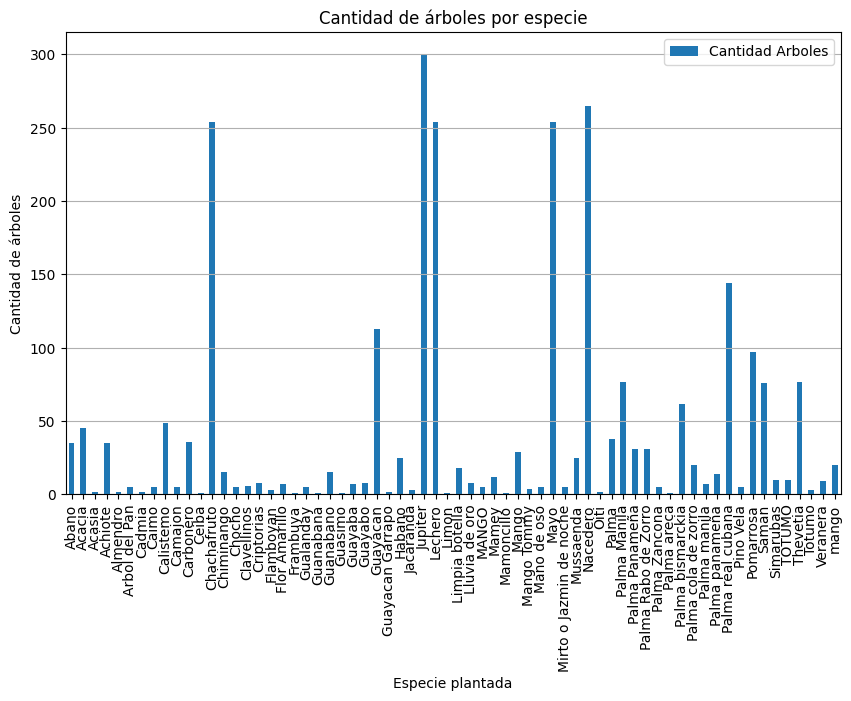

In [ ]:
import matplotlib.pyplot as plt

axis = siembras[['Especie plantada', 'Cantidad Arboles']]
data_grouped = axis.groupby('Especie plantada').sum()

data_grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Cantidad de árboles por especie')
plt.xlabel('Especie plantada')
plt.ylabel('Cantidad de árboles')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

In [ ]:
siembras['Latitud'] = siembras['Latitud Grados °'] + siembras['Latitud Minutos \''] / 60 + siembras['Latitud Segundos \"'] / 3600

siembras['Longitud'] = siembras['Longitud Grados °'] + siembras['Longitud Minutos \''] / 60 + siembras['Longitud Segundos \"'] / 3600

siembras.head()

,Vigencia,Codigo DANE Departamento,Departamento,Codigo DANE Municipio,Municipio,Especie plantada,Cantidad Arboles,Latitud Grados °,Latitud Minutos ',"Latitud Segundos """,Longitud Grados °,Longitud Minutos ',"Longitud Segundos """,Decimales Latitud,Decimales Longitud,Latitud,Longitud
0,2020-04-06,76,Valle del Cauca,520,Palmira,Mayo,254,3,31,39.0,76,16,47.0,3527500.0,-76279722.0,3.527500,76.279722
1,2020-04-06,76,Valle del Cauca,520,Palmira,Nacedero,254,3,31,39.0,76,16,47.0,3527500.0,-76279722.0,3.527500,76.279722
2,2020-04-06,76,Valle del Cauca,520,Palmira,Chachafruto,254,3,31,39.0,76,16,47.0,3527500.0,-76279722.0,3.527500,76.279722
3,2020-04-06,76,Valle del Cauca,520,Palmira,Lechero,254,3,31,39.0,76,16,47.0,3527500.0,-76279722.0,3.527500,76.279722
4,2020-06-16,76,Valle del Cauca,520,Palmira,Palma,9,3,31,51.1,76,18,53.0,3530854.0,-76314711.0,3.530861,76.314722


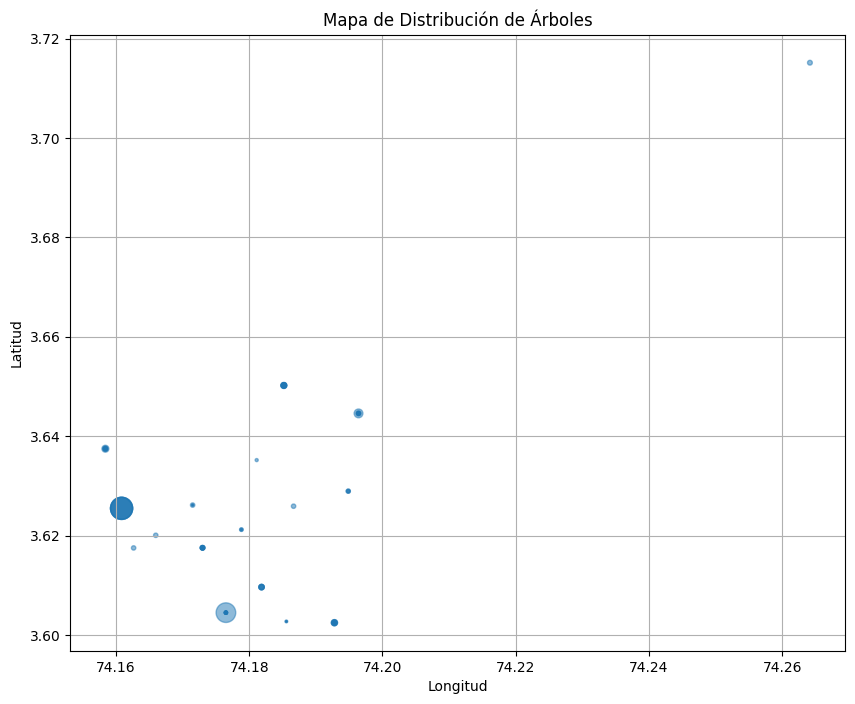

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

plt.scatter(siembras['Longitud Grados °'] + siembras['Longitud Minutos \''] / 60 + siembras['Longitud Segundos \"'] / 3600 + siembras['Decimales Longitud'] / 36000000,
            siembras['Latitud Grados °'] + siembras['Latitud Minutos \''] / 60 + siembras['Latitud Segundos \"'] / 3600 + siembras['Decimales Latitud'] / 36000000,
            s=siembras['Cantidad Arboles'], alpha=0.5)

plt.title('Mapa de Distribución de Árboles')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)

plt.show()

In [ ]:
pip install folium

In [ ]:
siembrasColombia = siembras[siembras['Longitud']<0]
siembrasIndia = siembras[siembras['Longitud']>0]
print(siembrasColombia.shape)
print(siembrasIndia.shape)

(34, 17)
(75, 17)


In [ ]:
import folium

mymap = folium.Map(location=[siembrasColombia['Latitud'].mean(), siembrasColombia['Longitud'].mean()], zoom_start=12)

for idx, row in siembrasColombia.iterrows():
    folium.CircleMarker(location=[row['Latitud'], row['Longitud']],
                        radius=row['Cantidad Arboles'] / 10,

                        popup=row['Especie plantada'],
                        fill=True,
                        color='blue').add_to(mymap)

mymap

# Thanks!